In [1]:
from tvb.simulator.lab import *

   INFO  log level set to INFO


In [8]:
oscilator = models.Generic2dOscillator()

In [11]:
import numpy
white_matter = connectivity.Connectivity(load_default=True)
white_matter.speed = numpy.array([4.0])

WARNING  File 'hemispheres' not found in ZIP.


In [12]:
white_matter_coupling = coupling.Linear(a=0.0154)

In [13]:
heunint = integrators.HeunDeterministic(dt=2**-6)

In [14]:
#Initialise some Monitors with period in physical time
mon_raw = monitors.Raw()
mon_tavg = monitors.TemporalAverage(period=2**-2)

#Bundle them
what_to_watch = (mon_raw, mon_tavg)



In [15]:
#Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
sim = simulator.Simulator(model = oscilator, connectivity = white_matter,
                          coupling = white_matter_coupling, 
                          integrator = heunint, monitors = what_to_watch)

sim.configure()

Parameter,Value,Description
initial_conditions,None,"Initial conditions from which the simulation will begin. By default, random initial conditions are provided. Needs to be the same shape as simulator 'history', ie, initial history function which defines the minimal initial state of the network with time delays before time t=0. If the number of time points in the provided array is insufficient the array will be padded with random values based on the 'state_variables_range' attribute."
coupling,"Linear(a=0.0154, b=0)",The coupling function is applied to the activity propagated between regions by the ``Long-range connectivity`` before it enters the local dynamic equations of the Model. Its primary purpose is to 'rescale' the incoming activity to a level appropriate to Model.
stimulus,None,"A ``Spatiotemporal stimulus`` can be defined at the region or surface level. It's composed of spatial and temporal components. For region defined stimuli the spatial component is just the strength with which the temporal component is applied to each region. For surface defined stimuli, a (spatial) function, with finite-support, is used to define the strength of the stimuli on the surface centred around one or more focal points. In the current version of TVB, stimuli are applied to the first state variable of the ``Local dynamic model``."
integrator,HeunDeterministic(dt=0.015625),A tvb.simulator.Integrator object which is an integration scheme with supporting attributes such as integration step size and noise specification for stochastic methods. It is used to compute the time courses of the model state variables.
surface,None,"By default, a Cortex object which represents the cortical surface defined by points in the 3D physical space and their neighborhood relationship. In the current TVB version, when setting up a surface-based simulation, the option to configure the spatial spread of the ``Local Connectivity`` is available."
connectivity,"Connectivity(bound=False, value=None)","A tvb.datatypes.Connectivity object which contains the structural long-range connectivity data (i.e., white-matter tracts). In combination with the ``Long-range coupling function`` it defines the inter-regional connections. These couplings undergo a time delay via signal propagation with a propagation speed of ``Conduction Speed``"
conduction_speed,3.0,Conduction speed for ``Long-range connectivity`` (mm/ms)
simulation_length,1000.0,The length of a simulation (default in milliseconds).
model,"Generic2dOscillator(bound=False, value=None)","A tvb.simulator.Model object which describe the local dynamic equations, their parameters, and, to some extent, where connectivity (local and long-range) enters and which state-variables the Monitors monitor. By default the 'Generic2dOscillator' model is used. Read the Scientific documentation to learn more about this model."
monitors,"(Raw(bound=False, value=None), TemporalAverage(bound=False, value=None))","A tvb.simulator.Monitor or a list of tvb.simulator.Monitor objects that 'know' how to record relevant data from the simulation. Two main types exist: 1) simple, spatial and temporal, reductions (subsets or averages); 2) physiological measurements, such as EEG, MEG and fMRI. By default the Model's specified variables_of_interest are returned, temporally downsampled from the raw integration rate to a sample rate of 1024Hz."


In [16]:
#Perform the simulation
raw_data = []
raw_time = []
tavg_data = []
tavg_time = []

for raw, tavg in sim(simulation_length=2**10):
    if not raw is None:
        raw_time.append(raw[0])
        raw_data.append(raw[1])
    
    if not tavg is None:
        tavg_time.append(tavg[0])
        tavg_data.append(tavg[1])

In [17]:


#Make the lists numpy.arrays for easier use.
RAW = numpy.array(raw_data)
TAVG = numpy.array(tavg_data)



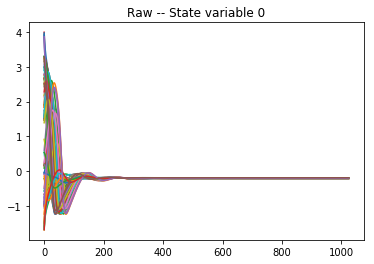

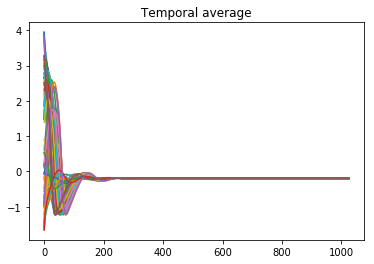

In [25]:
import matplotlib.pyplot as plt
#Plot raw time series
#figure(1)
plt.plot(raw_time, RAW[:, 0, :, 0])
plt.title("Raw -- State variable 0")
#Show them
plt.show()
#Plot temporally averaged time series
#figure(2)
plt.plot(tavg_time, TAVG[:, 0, :, 0])
plt.title("Temporal average")

#Show them
plt.show()



## Surface simulation tutorial

In [26]:
#Import a bunch of stuff to ease command line usage
from tvb.simulator.lab import *

In [27]:
#Initialise a Model, Coupling, and Connectivity.
oscillator = models.Generic2dOscillator()
white_matter = connectivity.Connectivity(load_default=True)
white_matter.speed = numpy.array([4.0])

white_matter_coupling = coupling.Linear(a=0.014)

#Initialise an Integrator
heunint = integrators.HeunDeterministic(dt=2**-4)

WARNING  File 'hemispheres' not found in ZIP.


In [28]:
#Initialise a surface
default_cortex = cortex.Cortex(load_default=True)
default_cortex.coupling_strength = numpy.array([2**-10])

In [29]:
#Initialise some Monitors with period in physical time
mon_tavg = monitors.TemporalAverage(period=2**-2)
mon_savg = monitors.SpatialAverage(period=2**-2)
# load the default region mapping
rm = region_mapping.RegionMapping(load_default=True)
mon_eeg = monitors.EEG(load_default=True, region_mapping=rm)
#Bundle them
what_to_watch = (mon_tavg, mon_savg, mon_eeg)

In [30]:
#Initialise Simulator -- Model, Connectivity, Integrator, Monitors, and surface.
sim = simulator.Simulator(model = oscillator, connectivity = white_matter,
                          coupling = white_matter_coupling, 
                          integrator = heunint, monitors = what_to_watch,
                          surface = default_cortex)

sim.configure()

WARNING  Memory estimate exceeds total available RAM.


Parameter,Value,Description
initial_conditions,None,"Initial conditions from which the simulation will begin. By default, random initial conditions are provided. Needs to be the same shape as simulator 'history', ie, initial history function which defines the minimal initial state of the network with time delays before time t=0. If the number of time points in the provided array is insufficient the array will be padded with random values based on the 'state_variables_range' attribute."
coupling,"Linear(a=0.014, b=0)",The coupling function is applied to the activity propagated between regions by the ``Long-range connectivity`` before it enters the local dynamic equations of the Model. Its primary purpose is to 'rescale' the incoming activity to a level appropriate to Model.
stimulus,None,"A ``Spatiotemporal stimulus`` can be defined at the region or surface level. It's composed of spatial and temporal components. For region defined stimuli the spatial component is just the strength with which the temporal component is applied to each region. For surface defined stimuli, a (spatial) function, with finite-support, is used to define the strength of the stimuli on the surface centred around one or more focal points. In the current version of TVB, stimuli are applied to the first state variable of the ``Local dynamic model``."
integrator,HeunDeterministic(dt=0.0625),A tvb.simulator.Integrator object which is an integration scheme with supporting attributes such as integration step size and noise specification for stochastic methods. It is used to compute the time courses of the model state variables.
surface,"Cortex(bound=False, value=None)","By default, a Cortex object which represents the cortical surface defined by points in the 3D physical space and their neighborhood relationship. In the current TVB version, when setting up a surface-based simulation, the option to configure the spatial spread of the ``Local Connectivity`` is available."
connectivity,"Connectivity(bound=False, value=None)","A tvb.datatypes.Connectivity object which contains the structural long-range connectivity data (i.e., white-matter tracts). In combination with the ``Long-range coupling function`` it defines the inter-regional connections. These couplings undergo a time delay via signal propagation with a propagation speed of ``Conduction Speed``"
conduction_speed,3.0,Conduction speed for ``Long-range connectivity`` (mm/ms)
simulation_length,1000.0,The length of a simulation (default in milliseconds).
model,"Generic2dOscillator(bound=False, value=None)","A tvb.simulator.Model object which describe the local dynamic equations, their parameters, and, to some extent, where connectivity (local and long-range) enters and which state-variables the Monitors monitor. By default the 'Generic2dOscillator' model is used. Read the Scientific documentation to learn more about this model."
monitors,"(TemporalAverage(bound=False, value=None), SpatialAverage(bound=False, value=None), EEG(bound=False, value=None))","A tvb.simulator.Monitor or a list of tvb.simulator.Monitor objects that 'know' how to record relevant data from the simulation. Two main types exist: 1) simple, spatial and temporal, reductions (subsets or averages); 2) physiological measurements, such as EEG, MEG and fMRI. By default the Model's specified variables_of_interest are returned, temporally downsampled from the raw integration rate to a sample rate of 1024Hz."


In [31]:
#Perform the simulation
tavg_data = []
tavg_time = []
savg_data = []
savg_time = []
eeg_data = []
eeg_time = []
for tavg, savg, eeg in sim(simulation_length=2**2):
    if not tavg is None:
        tavg_time.append(tavg[0])
        tavg_data.append(tavg[1])
    
    if not savg is None:
        savg_time.append(savg[0])
        savg_data.append(savg[1])
    
    if not eeg is None:
        eeg_time.append(eeg[0])
        eeg_data.append(eeg[1])

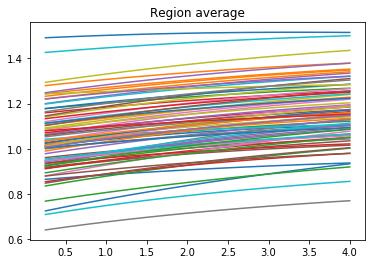

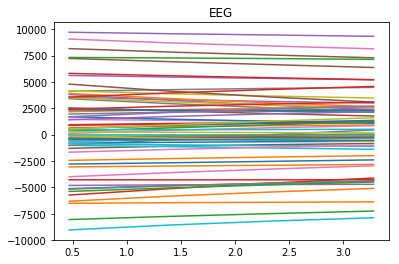

In [37]:
#Make the lists numpy.arrays for easier use.
TAVG = numpy.array(tavg_data)
SAVG = numpy.array(savg_data)
EEG = numpy.array(eeg_data)

#Plot region averaged time series
#figure(1)
plt.plot(savg_time, SAVG[:, 0, :, 0])
plt.title("Region average")
plt.show()
#Plot EEG time series
#figure(2)

plt.plot(eeg_time, EEG[:, 0, :, 0])
plt.title("EEG")

#Show them
plt.show()

## Exploring A Model

In [50]:


%pylab nbagg
from tvb.simulator.lab import *
from tvb.simulator.plot.phase_plane_interactive import PhasePlaneInteractive



Populating the interactive namespace from numpy and matplotlib


In [51]:
oscillator = models.Generic2dOscillator()
oscillator

Parameter,Value,Description
a,[-2.],Vertical shift of the configurable nullcline
tau,[1.],"A time-scale hierarchy can be introduced for the state variables :math:`V` and :math:`W`. Default parameter is 1, which means no time-scale hierarchy."
c,[0.],Parabolic term of the configurable nullcline
b,[-10.],Linear slope of the configurable nullcline
e,[3.],Coefficient of the quadratic term of the cubic nullcline.
d,[0.02],Temporal scale factor. Warning: do not use it unless you know what you are doing and know about time tides.
g,[0.],Coefficient of the linear term of the cubic nullcline.
f,[1.],Coefficient of the cubic term of the cubic nullcline.
I,[0.],Baseline shift of the cubic nullcline
state_variable_range,"{'W': array([-6., 6.]), 'V': array([-2., 4.])}","The values for each state-variable should be set to encompass the expected dynamic range of that state-variable for the current parameters, it is used as a mechanism for bounding random initial conditions when the simulation isn't started from an explicit history, it is also provides the default range of phase-plane plots."


<IPython.core.display.Javascript object>


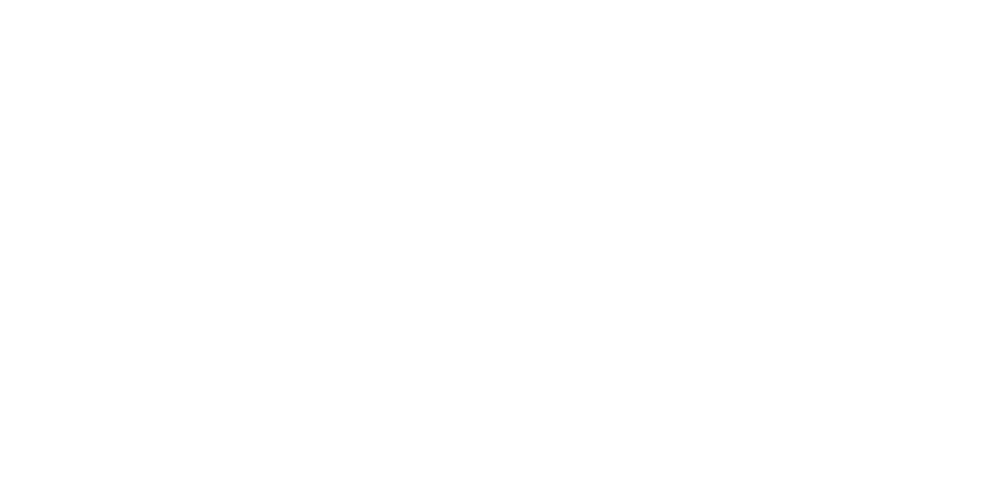

AttributeError: Unknown property axisbg

In [52]:

ppi_fig = PhasePlaneInteractive(model=oscillator)
ppi_fig.show()

## Command Profile in tvb

In [60]:
from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.COMMAND_PROFILE)
from tvb.interfaces.command.lab import *

In [61]:
list_projects()

                    name    id
         Default_Project     1
                 sandbox     2


In [63]:
proj = new_project("sandbox")

Invalid: Duplicate Name Error

In [64]:
list_projects()

                    name    id
         Default_Project     1
                 sandbox     2


In [65]:
list_datatypes(proj.id)

                    type              tag    id                              gid         date


In [66]:
import os
import tvb_data
p = os.path.join(os.path.dirname(tvb_data.__file__), 'connectivity/connectivity_66.zip')
import_conn_zip(proj.id, p)

   INFO  Starting operation ZIPConnectivityImporter
  ERROR  Could not launch Operation with the given input data!
Traceback (most recent call last):
  File "/home/knakul853/Desktop/Gsoc/tvb-framework/tvb/core/services/operation_service.py", line 333, in initiate_prelaunch
    result_msg, nr_datatypes = adapter_instance._prelaunch(operation, unique_id, available_space, **params)
  File "/home/knakul853/Desktop/Gsoc/tvb-framework/tvb/adapters/uploaders/abcuploader.py", line 82, in _prelaunch
    return ABCSynchronous._prelaunch(self, operation, uid, available_disk_space, **kwargs)
  File "/home/knakul853/Desktop/Gsoc/tvb-framework/tvb/core/adapters/abcadapter.py", line 87, in new_function
    return func(*args, **kw)
  File "/home/knakul853/Desktop/Gsoc/tvb-framework/tvb/core/adapters/abcadapter.py", line 322, in _prelaunch
    return self._capture_operation_results(result, uid)
  File "/home/knakul853/Desktop/Gsoc/tvb-framework/tvb/core/adapters/abcadapter.py", line 356, in _capture_op

OperationException: 'Connectivity' object has no attribute 'user_tag_1'

## Mouse Brain

In [67]:


from tvb.simulator.lab import *
LOG = get_logger('demo')
from tvb.simulator.plot.tools import *
import numpy as np
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)



WARNING  <type 'exceptions.RuntimeWarning'> -- divide by zero encountered in log10 


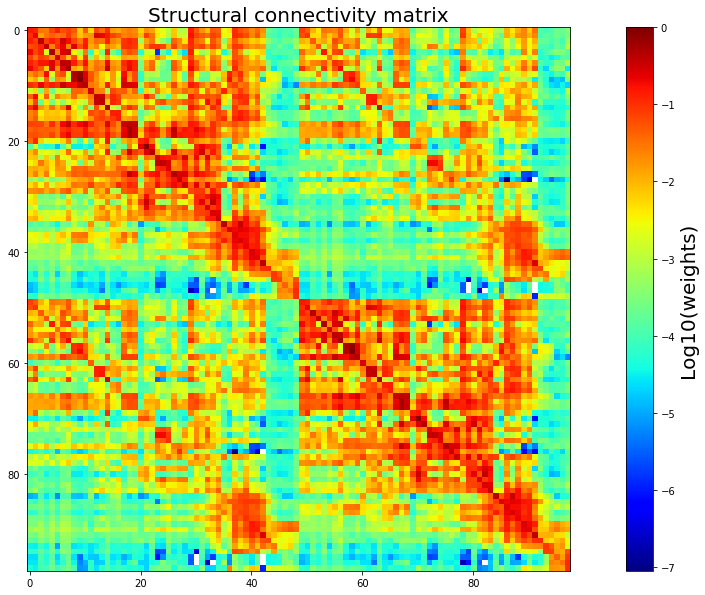

In [68]:
# Load the connectivity data from the directory tvb_data
con = connectivity.Connectivity.from_file("../mouse/allen_2mm/Connectivity.h5")

# Visualize the structural connectivity matrix
plt.subplots()
cs=plt.imshow(np.log10(con.weights), cmap='jet', aspect='equal', interpolation='none')
plt.title('Structural connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Log10(weights)', fontsize=20)

In [71]:
# Set the parameter of the resting state simulation
sim = simulator.Simulator(model=models.ReducedWongWang(w=1.0, I_o=0.3),
                        connectivity=con,
                        coupling=coupling.Linear(a=0.096),
                        integrator=integrators.EulerStochastic(dt=0.1, noise=noise.Additive(nsig=0.000013)),
                        monitors=(monitors.Bold(period=2e3),
                                  monitors.TemporalAverage(period=1e3)),
                        simulation_length=1200e3).configure()
# Run the resting state simulation
(bold_time, bold_data), _ = sim.run()